In [2]:
import numpy as np 
from numpy.linalg import norm as norm
import matplotlib.pyplot as plt
import basis_set_exchange as bse
from pyscf.geomopt.berny_solver import optimize
from scipy.interpolate import BSpline as spline
ang2bohr=1.8897261246
bohr2ang=.5291772109
hartree2kcal=627.509
uffbde=100/hartree2kcal
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append( '/home/administrator/Documenti/APDFT/prototyping/hessian/AAFF/Libs')
from aaff import aaff,alc_deriv_grad_nuc,alc_differential_grad_nuc
from Morse import Morse_interpolator,harm_freq,mpa
from FDcoeffs import *
from FcMole import FcM,FcM_like
from AP_class import APDFT_perturbator
from ABSE import absec
import matplotlib.patches as patches

In [4]:
co_min=(2.08272, -112.78661621869807)
nn_min=(2.01389, -108.98906407528155)
bf_min=(2.35348, -124.16243198073053)
pcx2=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9])
bde={"bf":uffbde,\
    "co_bf":uffbde*3,\
    "co_nn":uffbde*3,\
    "nn":uffbde*3,\
}

In [5]:
predictions=np.load("predictionsdiatomics.npy")
epbf_co=predictions[0]
gpbf_co=predictions[1]
hpbf_co=predictions[2]

In [6]:
scanpts2=np.linspace(1.7,2.8,31)
NNscan2,COscan2,BFscan2=np.load("scan2diatomics.npy")

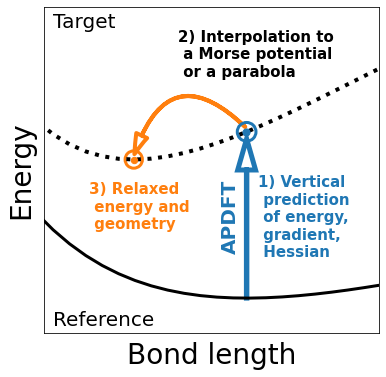

In [24]:
plt.figure(figsize=(6,6))
#plt.plot(scanpts2,np.asarray(COscan2)-min(COscan2)-.15,lw=5,color="green")
plt.plot(scanpts2,np.asarray(BFscan2)-min(BFscan2)-.35,lw=3,color="black")

i=2

#bf->co
mi = Morse_interpolator(gpbf_co[i],hpbf_co[i+1],bf_min[0],bde["co_bf"],\
                        epbf_co[i]-min(COscan2)-.15)
plt.plot(scanpts2,mi.E(scanpts2),lw=4,color="black",ls=":")

#plt.scatter(*mi.minimum(),color="black",marker="|",linewidths=10000,s=250,lw=3)

plt.arrow(bf_min[0],-.35,0,epbf_co[i]-min(COscan2)+.19 ,length_includes_head=True,\
          edgecolor="C0",facecolor="None",lw=5,head_width=.04,head_length=.045)

a3 = patches.FancyArrowPatch((bf_min[0], epbf_co[i]-min(COscan2)-.15+.005),(mi.minimum()[0], mi.minimum()[1]+.005),
connectionstyle="arc3,rad=.8",lw=4,arrowstyle="simple,head_length=20, head_width=12 ",edgecolor="C1",facecolor="None")
plt.gca().add_patch(a3)

plt.scatter(bf_min[0] ,epbf_co[i]-min(COscan2)-.15,edgecolor="C0",facecolor="None",s=350,lw=3)
plt.scatter(bf_min[0]-.0007 ,epbf_co[i]-min(COscan2)-.15,color="C0",s=50, zorder=2)
plt.scatter(mi.minimum()[0], mi.minimum()[1],edgecolor="C1",facecolor="None",s=300,lw=3)
plt.scatter(mi.minimum()[0], mi.minimum()[1],color="C1",s=40, zorder=2)


plt.yticks([])
plt.xticks([])
plt.ylabel("Energy",size=28,labelpad=9)
plt.xlabel("Bond length",size=28,labelpad=9)
#plt.title("APDFT - Morse potential interpolation",size=20)
plt.xlim(1.9,2.65)
plt.ylim(-0.4,0.07)

plt.text(1.92,0.04,"Target",size=20,color="black",weight="roman")
plt.text(1.92,-.39,"Reference",size=20,color="black",weight="roman")

plt.text(2.38,-0.29,"1) Vertical \n prediction \n of energy,\n gradient, \n Hessian" ,color="C0",size=15,weight="semibold")

plt.text(2.295,-0.28,"APDFT",size=20,weight="semibold",color="C0",rotation=90)
plt.text(2.2,-0.03,"2) Interpolation to\n a Morse potential \n or a parabola " ,color="black",size=15,weight="semibold")

plt.text(2,-0.25,"3) Relaxed \n energy and \n geometry " ,color="C1",size=15,weight="semibold")

plt.savefig("diatomics_scheme2.png",bbox_inches="tight")

In [7]:
mi.minimum()

(2.1006085723768595, -0.15031225707718732)

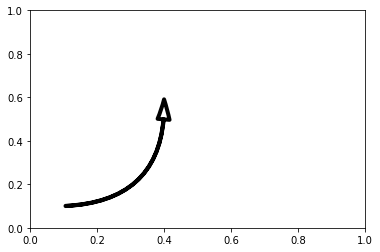

In [8]:
a3 = patches.FancyArrowPatch((0.1, 0.1), (0.4, 0.6),
                             connectionstyle="arc3,rad=.5",lw=4,
                             arrowstyle="simple,head_length=20, head_width=12 ",edgecolor="black",facecolor="None")
plt.gca().add_patch(a3)
#plt.arrow(0.1, 0.1, 0.4, 0.6,lw=3,edgecolor="black",facecolor="None")

In [9]:
help(patches.FancyArrowPatch)

Help on class FancyArrowPatch in module matplotlib.patches:

class FancyArrowPatch(Patch)
 |  FancyArrowPatch(posA=None, posB=None, path=None, arrowstyle='simple', connectionstyle='arc3', patchA=None, patchB=None, shrinkA=2, shrinkB=2, mutation_scale=1, mutation_aspect=1, dpi_cor=<deprecated parameter>, **kwargs)
 |  
 |  A fancy arrow patch. It draws an arrow using the `ArrowStyle`.
 |  
 |  The head and tail positions are fixed at the specified start and end points
 |  of the arrow, but the size and shape (in display coordinates) of the arrow
 |  does not change when the axis is moved or zoomed.
 |  
 |  Method resolution order:
 |      FancyArrowPatch
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, posA=None, posB=None, path=None, arrowstyle='simple', connectionstyle='arc3', patchA=None, patchB=None, shrinkA=2, shrinkB=2, mutation_scale=1, mutation_aspect=1, dpi_cor=<deprecated parameter>, **kwargs)
 |    